<a href="https://colab.research.google.com/github/Poushali11/Classification-prediction/blob/main/patientsurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/TrainingSet.csv")
train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
test = pd.read_csv("/content/TestingSet.csv")
test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23133,15,4975,DX6,26,23.968051,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [ ]:
train.shape

(16213, 18)

In [ ]:
test.shape

(6884, 17)

In [ ]:
train.isna().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             8
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            884
B                            884
C                            884
D                            884
E                            884
F                            884
Z                            884
Number_of_prev_cond          884
Has_Survived                   0
dtype: int64

In [ ]:
test.isna().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             5
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            351
B                            351
C                            351
D                            351
E                            351
F                            351
Z                            351
Number_of_prev_cond          351
dtype: int64

In [ ]:
train.drop_duplicates()
test.drop_duplicates()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23133,15,4975,DX6,26,23.968051,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,26113,49,3243,DX5,4,22.845678,NO,URBAN,Stable,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
6880,27360,25,9522,DX6,31,24.094697,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6881,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0
6882,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [ ]:
train.Has_Survived.value_counts()

1    10175
0     6038
Name: Has_Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


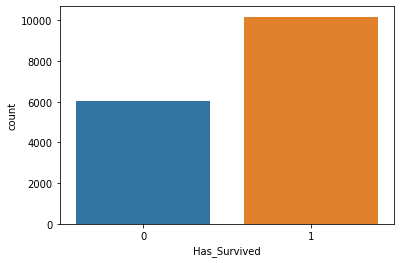

In [ ]:
sns.countplot(train['Has_Survived'])

The data is imbalanced

In [ ]:
train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,15329.000000,15329.000000,15329.000000,15329.000000,15329.000000,15329.000000,15329.000000,15329.000000,16213.000000
mean,16567.014001,26.327947,6251.478258,33.112502,23.470102,0.899145,0.136278,0.186509,0.086046,0.390763,0.052906,0.000522,1.752169,0.627583
std,9510.898029,15.019954,3592.491415,19.588643,3.816936,0.301146,0.343094,0.389530,0.280441,0.487937,0.223854,0.022840,0.773446,0.483464
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8327.000000,13.000000,3190.000000,16.000000,20.210141,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16646.000000,26.000000,6208.000000,33.000000,23.400853,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24796.000000,39.000000,9346.000000,50.000000,26.847724,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  16213 non-null  int64  
 1   Diagnosed_Condition        16213 non-null  int64  
 2   Patient_ID                 16213 non-null  int64  
 3   Treated_with_drugs         16205 non-null  object 
 4   Patient_Age                16213 non-null  int64  
 5   Patient_Body_Mass_Index    16213 non-null  float64
 6   Patient_Smoker             16213 non-null  object 
 7   Patient_Rural_Urban        16213 non-null  object 
 8   Patient_mental_condition   16213 non-null  object 
 9   A                          15329 non-null  float64
 10  B                          15329 non-null  float64
 11  C                          15329 non-null  float64
 12  D                          15329 non-null  float64
 13  E                          15329 non-null  flo

In [ ]:
train['Treated_with_drugs'].fillna(train['Treated_with_drugs'].mode(),inplace=True)
test['Treated_with_drugs'].fillna(test['Treated_with_drugs'].mode(),inplace=True)

In [ ]:
train['A'].fillna(train['A'].median(),inplace=True)
train['B'].fillna(train['B'].median(),inplace=True)
train['C'].fillna(train['C'].median(),inplace=True)
train['D'].fillna(train['D'].median(),inplace=True)
train['E'].fillna(train['E'].median(),inplace=True)
train['F'].fillna(train['F'].median(),inplace=True)
train['Z'].fillna(train['Z'].median(),inplace=True)
train['Number_of_prev_cond'].fillna(train['Number_of_prev_cond'].median(),inplace=True)

In [ ]:
test['A'].fillna(test['A'].median(),inplace=True)
test['B'].fillna(test['B'].median(),inplace=True)
test['C'].fillna(test['C'].median(),inplace=True)
test['D'].fillna(test['D'].median(),inplace=True)
test['E'].fillna(test['E'].median(),inplace=True)
test['F'].fillna(test['F'].median(),inplace=True)
test['Z'].fillna(test['Z'].median(),inplace=True)
test['Number_of_prev_cond'].fillna(test['Number_of_prev_cond'].mode(),inplace=True)

In [ ]:
train.shape

(16213, 18)

In [ ]:
test.shape

(6884, 17)

In [ ]:
df1=pd.get_dummies(train['Patient_Rural_Urban'])

In [ ]:
tf1=pd.get_dummies(test['Patient_Rural_Urban'])

In [ ]:
df2=pd.get_dummies(train['Patient_Smoker'])

In [ ]:
tf2=pd.get_dummies(test['Patient_Smoker'])

In [ ]:
df3=pd.get_dummies(train['Patient_mental_condition'])

In [ ]:
tf3=pd.get_dummies(test['Patient_mental_condition'])

In [ ]:
train1 = pd.concat([train, df1, df2 , df3],axis=1)
del train1['Patient_Rural_Urban']
del train1['Patient_Smoker']
del train1['Patient_mental_condition']

train1.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,...,F,Z,Number_of_prev_cond,Has_Survived,RURAL,URBAN,Cannot say,NO,YES,Stable
0,18164,5,5740,DX2,36,22.945566,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,1,1
1,5339,51,12011,DX1,5,19.130976,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,1,0,1,0,1
2,5138,52,5296,DX3,53,19.103244,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1,1,0,0,1,0,1
3,17265,9,5947,DX5,3,18.126976,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,1,0,1,0,1
4,24349,47,6585,DX4,62,25.074482,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,1,0,1,0,1


In [ ]:
train1['Treated_with_drugs_1'] = train1['Treated_with_drugs'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
test['Treated_with_drugs_1'] = test['Treated_with_drugs'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
test1 = pd.concat([test,tf1,tf2,tf3],axis=1)
del test1['Patient_Rural_Urban']
del test1['Patient_Smoker']
del test1['Patient_mental_condition']
del test1['Treated_with_drugs']
del train1['Treated_with_drugs']

In [ ]:
train1.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Z,Number_of_prev_cond,Has_Survived,RURAL,URBAN,Cannot say,NO,YES,Stable,Treated_with_drugs_1
0,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,1,1,2.0
1,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,1,0,1,0,1,1.0
2,5138,52,5296,53,19.103244,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,1,1,0,0,1,0,1,3.0
3,17265,9,5947,3,18.126976,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0,0,1,0,1,0,1,5.0
4,24349,47,6585,62,25.074482,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,1,0,1,0,1,4.0


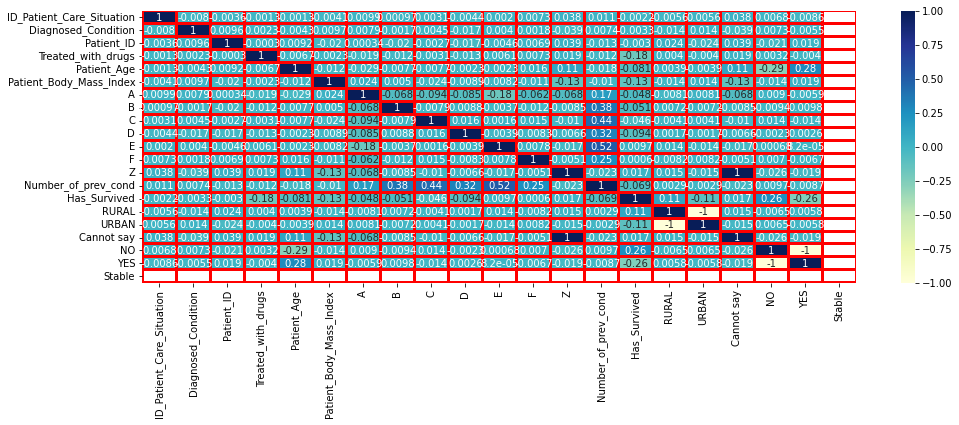

In [ ]:
plt.figure(figsize=(16,5))
dataplot= sns.heatmap(train1.corr(),cmap='YlGnBu',annot=True,linewidths=2,linecolor='red')
plt.show()

Low and moderate multicollinearity , so no multicolllinearity problem.

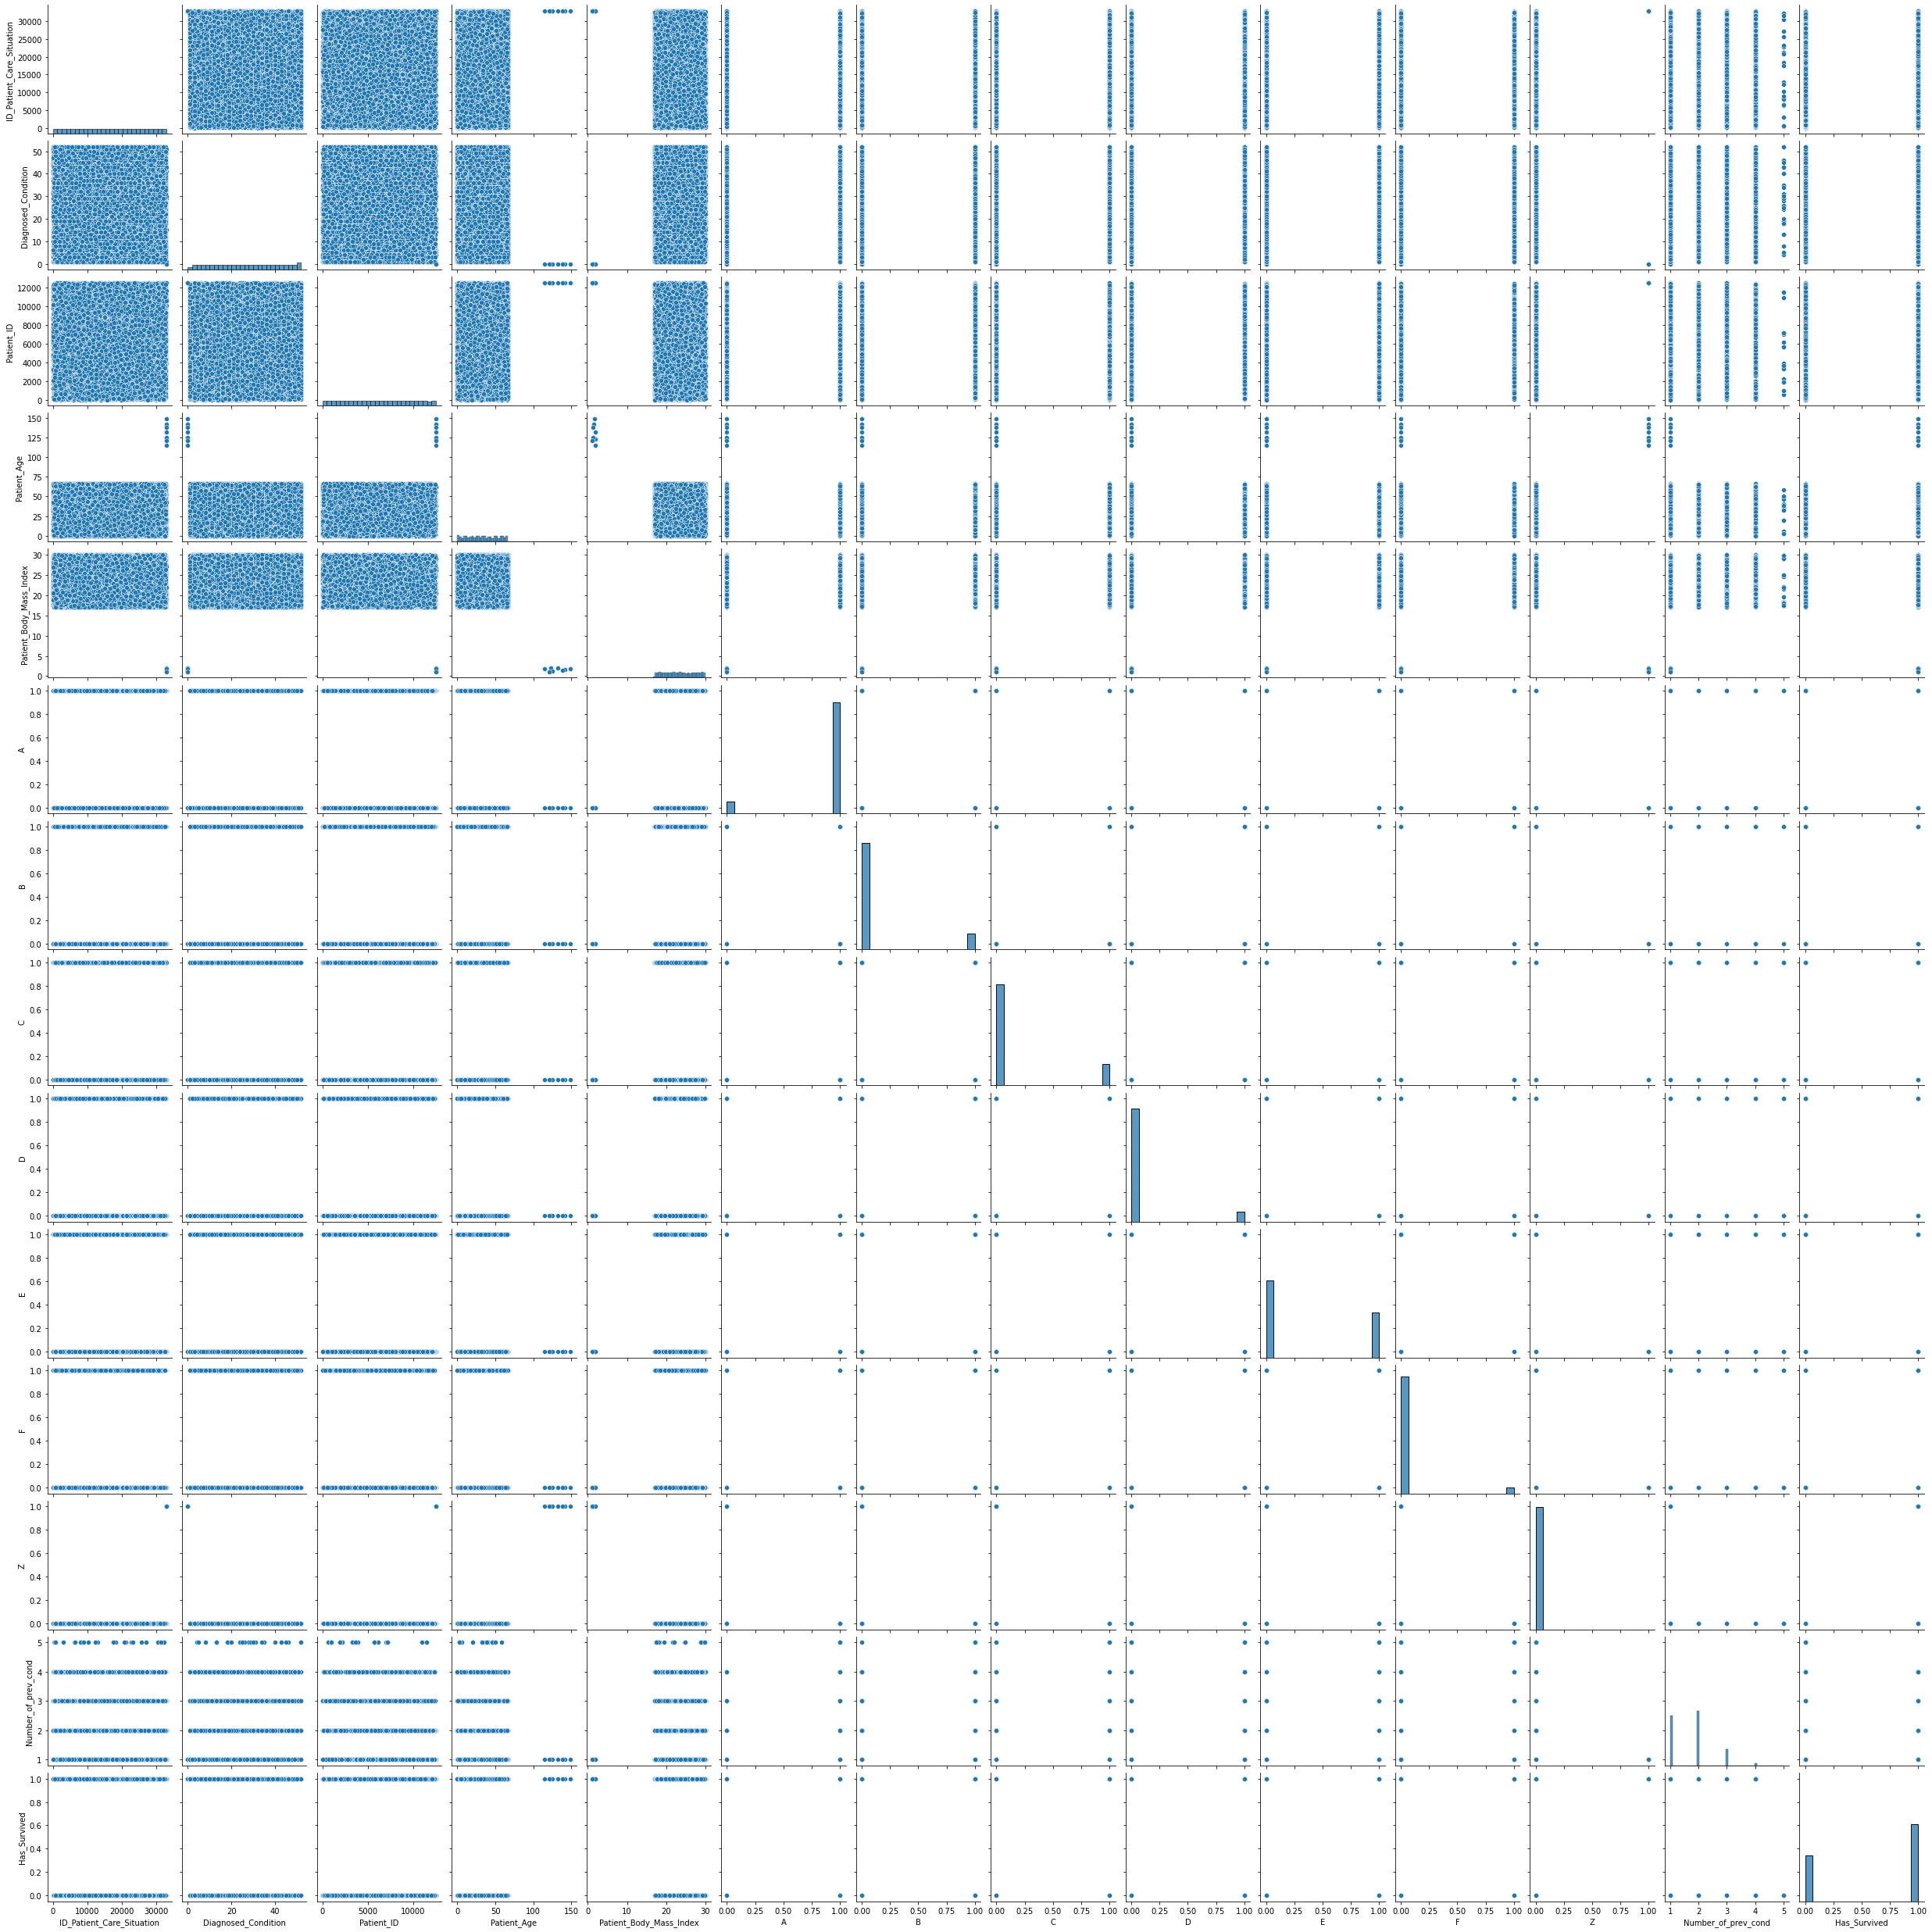

In [ ]:
sns.pairplot(train,kind='scatter')

(array([3.627e+03, 3.624e+03, 3.590e+03, 3.592e+03, 1.772e+03, 0.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00, 3.000e+00]),
 array([  0. ,  14.9,  29.8,  44.7,  59.6,  74.5,  89.4, 104.3, 119.2,
        134.1, 149. ]),
 <a list of 10 Patch objects>)

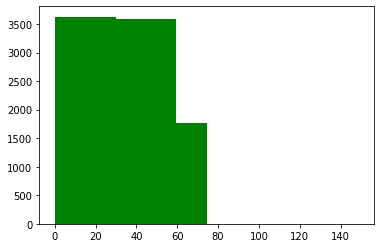

In [ ]:
plt.hist(train1['Patient_Age'],bins= 10,histtype='bar', color='green')

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  16213 non-null  int64  
 1   Diagnosed_Condition        16213 non-null  int64  
 2   Patient_ID                 16213 non-null  int64  
 3   Treated_with_drugs         16213 non-null  int64  
 4   Patient_Age                16213 non-null  int64  
 5   Patient_Body_Mass_Index    16213 non-null  float64
 6   A                          16213 non-null  float64
 7   B                          16213 non-null  float64
 8   C                          16213 non-null  float64
 9   D                          16213 non-null  float64
 10  E                          16213 non-null  float64
 11  F                          16213 non-null  float64
 12  Z                          16213 non-null  float64
 13  Number_of_prev_cond        16213 non-null  flo

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  6884 non-null   int64  
 1   Diagnosed_Condition        6884 non-null   int64  
 2   Patient_ID                 6884 non-null   int64  
 3   Patient_Age                6884 non-null   int64  
 4   Patient_Body_Mass_Index    6884 non-null   float64
 5   A                          6884 non-null   float64
 6   B                          6884 non-null   float64
 7   C                          6884 non-null   float64
 8   D                          6884 non-null   float64
 9   E                          6884 non-null   float64
 10  F                          6884 non-null   float64
 11  Z                          6884 non-null   float64
 12  Number_of_prev_cond        6533 non-null   float64
 13  Treated_with_drugs_1       6879 non-null   float

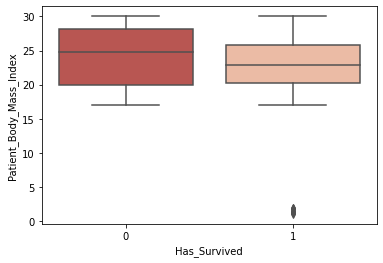

In [ ]:
sns.boxplot(x='Has_Survived',y= 'Patient_Body_Mass_Index',data=train1,palette=sns.color_palette('RdBu',5))

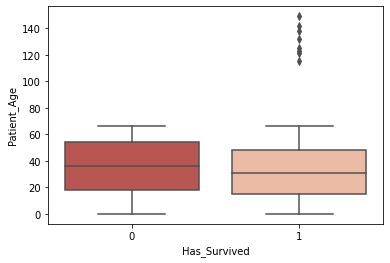

In [ ]:
sns.boxplot(x='Has_Survived',y='Patient_Age',data=train1,palette=sns.color_palette('RdBu',5))

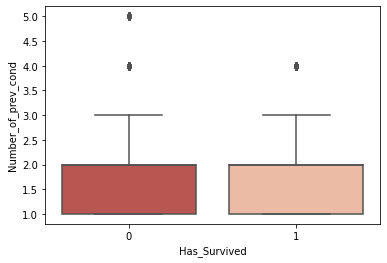

In [ ]:
sns.boxplot(x='Has_Survived',y='Number_of_prev_cond',data=train1,palette=sns.color_palette('RdBu',5))

Three outliers detected in the number of previous conditions w.r.t the survival of patients, however it might be a case of swamping, so i am not treating the outliers.

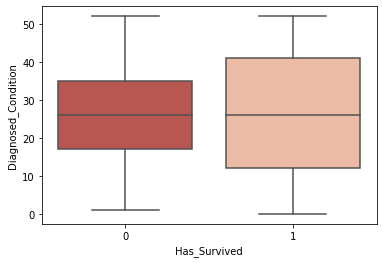

In [ ]:
sns.boxplot(x='Has_Survived',y='Diagnosed_Condition',data= train1,palette=sns.color_palette('RdBu',5))

In [ ]:
train1 = train1[['ID_Patient_Care_Situation','Diagnosed_Condition','Patient_ID','Treated_with_drugs_1','Patient_Age','Patient_Body_Mass_Index','A','B','C','D','E','F','Z','Number_of_prev_cond','RURAL','URBAN','NO','YES','Stable','Has_Survived']]
test1 = test1[['ID_Patient_Care_Situation','Diagnosed_Condition','Patient_ID','Treated_with_drugs_1','Patient_Age','Patient_Body_Mass_Index','A','B','C','D','E','F','Z','Number_of_prev_cond','RURAL','URBAN','NO','YES','Stable']]

In [ ]:
X_train = train1.iloc[:, :19]
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs_1,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,RURAL,URBAN,NO,YES,Stable
0,18164,5,5740,2.0,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1
1,5339,51,12011,1.0,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1
2,5138,52,5296,3.0,53,19.103244,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1
3,17265,9,5947,5.0,3,18.126976,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,1,0,1
4,24349,47,6585,4.0,62,25.074482,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1


In [ ]:
test1.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,RURAL,URBAN,NO,YES,Stable
0,22374,8,3333,30,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,1,1
1,6283,23,10446,30,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1
2,33012,0,12513,31,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,1
3,10808,45,7977,30,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1
4,23133,15,4975,30,26,23.968051,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,1,1


In [ ]:
Y_train= train1.iloc[:,19]
Y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: Has_Survived, dtype: int64

In [ ]:
Y_test= pd.read_csv("/content/Tran.csv")
Y_test.head()

,Has_Survived
0,0
1,0
2,1
3,0
4,1


In [ ]:
def norm_func(i):
  x= i - i.min()/(i.max()- i.min())
  return(x)
X_train_norm = norm_func(X_train)
X_test_norm = norm_func(test1)

In [ ]:
X_train_norm = X_train_norm.replace((np.inf,  -np.inf, np.nan),0).reset_index(drop=True)
X_test_norm = X_test_norm.replace((np.inf, -np.inf,np.nan),0).reset_index(drop=True)

#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(solver='lbfgs')
logreg.fit(X_train_norm,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Feature Importance

Feature: 0,Score: 0.00001
Feature: 1,Score: 0.00998
Feature: 2,Score: 0.00002
Feature: 3,Score: -0.02589
Feature: 4,Score: -0.00475
Feature: 5,Score: 0.03348
Feature: 6,Score: 0.00286
Feature: 7,Score: -0.00247
Feature: 8,Score: -0.00219
Feature: 9,Score: -0.00429
Feature: 10,Score: 0.00329
Feature: 11,Score: 0.00036
Feature: 12,Score: 0.00010
Feature: 13,Score: -0.00055
Feature: 14,Score: 0.01403
Feature: 15,Score: -0.00765
Feature: 16,Score: 0.02710
Feature: 17,Score: -0.02082
Feature: 18,Score: 0.00000


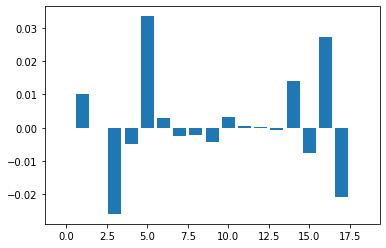

In [ ]:
importance = logreg.coef_[0]

for i,v in enumerate(importance):
  print('Feature: %0d,Score: %.5f'% (i,v))

plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [ ]:
lr_probs= logreg.predict_proba(X_test_norm)
lr_probs= lr_probs[:,1]

In [ ]:
y_pred = logreg.predict(X_test_norm)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import recall_score
recall_score(Y_test,y_pred,average=None,zero_division=1)

array([0.04071661, 0.9701897 ])

In [ ]:
#Model Evaluation
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[ 100, 2356],
       [ 132, 4296]])

In [ ]:
Y_test.shape

(6884, 1)

In [ ]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.04      0.07      2456
           1       0.65      0.97      0.78      4428

    accuracy                           0.64      6884
   macro avg       0.54      0.51      0.42      6884
weighted avg       0.57      0.64      0.53      6884



In [ ]:
acc= (100+4296)/6884
acc

0.6385822196397444

The recall value for 1 i.e patient survived after 1 year is high but recall value for 0 i.e patient did not survive is low

#PyCaret

In [ ]:
df= pd.concat([test, Y_test],axis=1)

In [ ]:
data= pd.concat([train, df],axis=0)

In [ ]:
data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,14892,8,9461,DX6,60,18.690567,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
7,2372,35,8995,DX5,41,23.435484,YES,RURAL,Stable,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0
8,14658,44,971,DX5,23,17.039536,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
9,24920,37,4704,DX1,22,27.741955,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23097 entries, 0 to 6883
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  floa

In [ ]:
cat_features=['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']

In [ ]:
!pip install pycaret pandas shap

     |████████████████████████████████| 320 kB 21.8 MB/s 
     |████████████████████████████████| 564 kB 40.3 MB/s 
     |████████████████████████████████| 1.3 MB 62.8 MB/s 
     |████████████████████████████████| 167 kB 53.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 1.7 MB 55.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 41.6 MB/s 
     |████████████████████████████████| 118 kB 59.2 MB/s 
     |████████████████████████████████| 6.8 MB 59.2 MB/s 
     |████████████████████████████████| 2.0 MB 45.4 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 261 kB 56.2 MB/s 
     |████████████████████████████████| 303 kB 49.5 MB/s 
     |████████████████████████████████| 3.1 MB 56.4 MB/s 
     |████████████████

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
experiment = setup(data,target='Has_Survived',categorical_features = cat_features, session_id=123)

,Description,Value
0,session_id,123
1,Target,Has_Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(23097, 18)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(sort='Recall')
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6320,0.5000,1.0000,0.6320,0.7745,0.0000,0.0000,0.032
gbc,Gradient Boosting Classifier,0.8245,0.9130,0.9011,0.8346,0.8665,0.6116,0.6159,2.763
ada,Ada Boost Classifier,0.8151,0.8934,0.8919,0.8288,0.8591,0.5913,0.5949,0.758
lightgbm,Light Gradient Boosting Machine,0.8339,0.9181,0.8806,0.8600,0.8701,0.6397,0.6403,0.315
rf,Random Forest Classifier,0.8111,0.8942,0.8760,0.8337,0.8543,0.5863,0.5879,2.167
et,Extra Trees Classifier,0.7827,0.8585,0.8623,0.8071,0.8338,0.5211,0.5236,2.080
ridge,Ridge Classifier,0.7317,0.0000,0.8588,0.7521,0.8018,0.3923,0.4007,0.041
lr,Logistic Regression,0.7075,0.7457,0.8581,0.7316,0.7879,0.3224,0.3263,0.652
lda,Linear Discriminant Analysis,0.7316,0.7888,0.8531,0.7545,0.8007,0.3945,0.4017,0.170
dt,Decision Tree Classifier,0.7578,0.7397,0.8082,0.8086,0.8083,0.4793,0.4793,0.140


DummyClassifier(constant=None, random_state=123, strategy='prior')


#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=0.5,max_features=2,max_depth=2, random_state=0)
gb_clf.fit(X_train_norm, Y_train)
pred= gb_clf.predict(X_test_norm)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report:")
print(classification_report(Y_test,pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      2456
           1       0.79      0.92      0.85      4428

    accuracy                           0.79      6884
   macro avg       0.79      0.74      0.75      6884
weighted avg       0.79      0.79      0.78      6884



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test,pred))

Confusion Matrix:
[[1351 1105]
 [ 342 4086]]


#Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X_train_norm,Y_train)
pred2=dummy_clf.predict(X_test_norm)

In [ ]:
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.35      0.50      0.41      2456
           1       0.64      0.50      0.56      4428

    accuracy                           0.50      6884
   macro avg       0.50      0.50      0.49      6884
weighted avg       0.54      0.50      0.51      6884



#Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train_norm, Y_train)

pred3= model.predict(X_test_norm)
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71      2456
           1       0.83      0.89      0.86      4428

    accuracy                           0.81      6884
   macro avg       0.80      0.78      0.78      6884
weighted avg       0.81      0.81      0.81      6884



Ada Boost Classifier is giving a better recall value than rest , so this is the final predictions which i will submit

In [ ]:
pred3= pd.DataFrame(pred3)
pred3.head()

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
pred3.to_csv("PoushaliNag.csv", index=False,header=False)